# Assignment Rules

You have to complete your assignment by sending to vbaghdasaryan@aua.am email address three python notebooks. 

You need to use markdown option of jupyter notebooks to provide the narratives of your answers to questions. There is no need to produce a separate word report. You have 3 assignments to complete, for each of them attach one jupyter notebook with the following name: Your_name_Your_surname_Problem_Number. 

You are allowed to consult any material you want. The only limitation is absence of any type of communication with your peers inside and outside the lab. 

The duration of exam is 3 hours. 


## Problem 1. Export Forecasting

You are provided with data on Armenia’s export (quarterly data) up to first quarter of 2017. Also you have additional set of data on Russian GDP growth rate and price of copper and other variables.



1.	To start with provide data description, plot the quarterly export data and provide any tendency you think is present in the data. 

2.	Your next goal is to forecast Armenia’s export for the last 3 quarters of 2017. At this stage please fit a univariate model (e.g. Arima or Sarima). You need to provide justification on number of AR and MA terms you use, as well as on degree of differencing (if required). Clearly state what criteria you use to select among various models that you might end up fitting. 

3.	After selecting the model, provide the forecast with its confidence intervals. Then open the myXLs file provided to you and compare your forecast with actual export. Comment on the accuracy of your prediction. Provide some ideas why your forecast might be wrong (factors you haven’t taken into account). 

4.	Now fit a multivariate ARDL model. Consider as exogenous variables Russian GDP and price of copper (ignore all the other variables). Make sure that you have stationary data (use Augmented Dickey-Fuller test to convince the reader). Choose appropriate order of lags you are going to use in your ARDL model (I propose checking 1st and 2nd lags only for exogenous variables and taking into account seasonality of exports - 4th lag of differenced exports). Comment on the significance and economic meaning of the variables that you have used as exogenous to your exports. Compare it with your ARIMA model. Which of the 2 models is preferable.  



In [130]:
#This is the code that will load the dataset you need. 

In [131]:
#Import basic libariaries
%matplotlib inline
import math
import numpy as np
import scipy
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from pandas import Series, DataFrame
import pandas_datareader.data as web
import matplotlib as mpl
from matplotlib import pyplot
sns.set_style('whitegrid')

import os
import sys
from scipy import stats
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [166]:
df=pd.read_excel('Data_Time Series_v1.xls')

In [167]:
#Please load all the other libraries as you find them necessary for your assignment!. Good luck!!!

### Answer to question 1

In [168]:
df.head()

,Date,Total.Export,Exchange rate RUB,Exchange rate USD,"EU GDP Growth, %","Russia GDP Growth, %",Copper.Price,Gold.Price,Eurasion Union
0,2005-01-01,188690.6,16.464335,458.13,0.300000,1.748082,3264.701587,13739.601645,0
1,2005-04-01,220138.5,15.427541,442.34,0.796644,1.522295,3387.145599,13740.887673,0
2,2005-07-01,240254.3,15.586917,444.21,0.831504,1.762205,3750.348124,14137.305804,0
3,2005-10-01,242958.9,15.641101,450.19,0.812943,2.062840,4303.783586,15567.368940,0
4,2006-01-01,167633.7,16.241995,450.92,0.848295,1.930605,4947.503606,17813.738349,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
Date                    50 non-null datetime64[ns]
Total.Export            50 non-null float64
Exchange rate RUB       50 non-null float64
Exchange rate USD       50 non-null float64
EU GDP Growth, %        50 non-null float64
Russia GDP Growth, %    50 non-null float64
Copper.Price            50 non-null float64
Gold.Price              50 non-null float64
Eurasion Union          50 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 3.6 KB


In [170]:
df.describe()

,Total.Export,Exchange rate RUB,Exchange rate USD,"EU GDP Growth, %","Russia GDP Growth, %",Copper.Price,Gold.Price,Eurasion Union
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,290104.566000,11.873931,404.085354,0.312790,0.673330,6515.135764,35392.635125,0.200000
std,88524.112885,2.584366,54.981807,0.650227,1.353601,1608.988999,11953.457359,0.404061
min,105260.700000,6.526667,302.120000,-2.621301,-3.526982,3264.701587,13739.601645,0.000000
25%,230907.950000,10.533091,367.567500,0.161812,0.013851,5270.536977,26169.705279,0.000000
50%,275236.850000,12.444226,405.465000,0.492259,0.844527,7027.542222,38405.457932,0.000000
75%,353543.200000,13.311600,450.737500,0.664720,1.691635,7677.902353,42373.818832,0.000000
max,522201.600000,16.464335,488.670000,0.989546,3.193832,9639.165399,55356.753753,1.000000


In [171]:
df.set_index('Date',inplace=True)

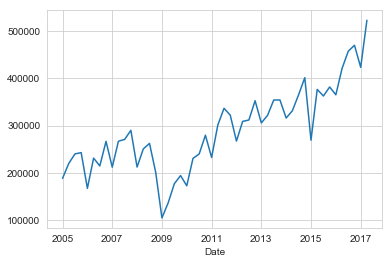

In [172]:
df['Total.Export'].plot() 
plt.show()

In [173]:
result = adfuller(df['Total.Export'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.046910
p-value: 0.575667
Critical Values:
	1%: -4.198
	5%: -3.524
	10%: -3.193


From the graph we can see that data is non-stationary and that there is an apparent trend, yet I do not observe the seasonal pattern

### Answer to question 2

As I do not observe seasonality, I'll go onwith the ARIMA model, rather the SARIMA

In [174]:
df['de'] = df['Total.Export'].diff(periods=1)
df.dropna(inplace=True)

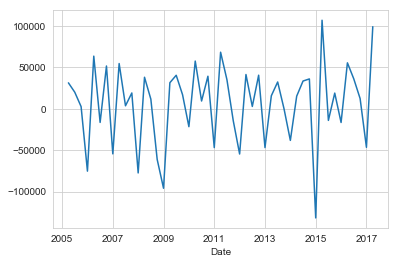

In [175]:
df['de'].plot() 
plt.show()

In [176]:
result = adfuller(df['de'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.754696
p-value: 0.018999
Critical Values:
	1%: -4.219
	5%: -3.533
	10%: -3.198


Data became stationary after the first differencing, so it is I(1) and there is no need to difference it further

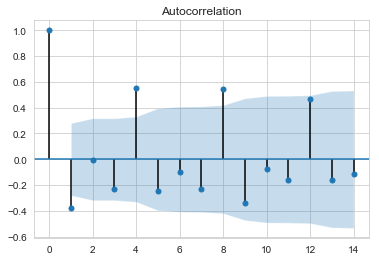

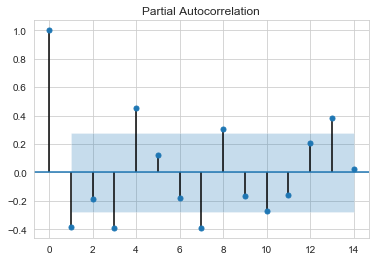

In [177]:
plot_acf(df['de'],lags=14)
pyplot.show()
plot_pacf(df['de'],lags=14)
pyplot.show()

According to Rule 7; if the ACF of the differenced series displays a sharp cutoff and the lag-1 autocorrelation is negative--i.e, than the series appears slightly "overdifferenced", and it is needed to add an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.
##### Thus, we should add 1 MA term and use the ARIMA (0,1,1) model for forecasting

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Total.Export   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -581.057
Method:                       css-mle   S.D. of innovations          43626.751
Date:                Thu, 16 May 2019   AIC                           1168.114
Time:                        17:26:46   BIC                           1173.728
Sample:                    07-01-2005   HQIC                          1170.236
                         - 04-01-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5504.8785   3220.941      1.709      0.094    -808.049    1.18e+04
ma.L1.D.Total.Export    -0.4997      0.122     -4.111      0.000      -0.738      -0.261
            

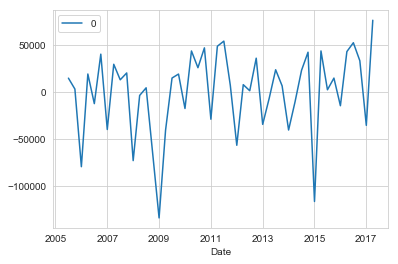

                   0
count      48.000000
mean      -53.377406
std     44116.992320
min   -133748.359137
25%    -20441.607995
50%      7301.915704
75%     30270.863393
max     76076.262257


In [178]:
# fit model
model = ARIMA(df['Total.Export'], order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

I'll try the autoarima to find the best model

In [146]:
stepwise_fit = auto_arima(df['Total.Export'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=False, d=1, D=1, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True)  

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1); AIC=1170.073, BIC=1177.558, Fit time=0.091 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1176.916, BIC=1180.658, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1170.752, BIC=1176.365, Fit time=0.111 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1168.114, BIC=1173.728, Fit time=0.075 seconds


/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

Fit ARIMA: order=(0, 1, 2); AIC=1170.052, BIC=1177.537, Fit time=0.127 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.726 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -581.057
Method:                       css-mle   S.D. of innovations          43626.751
Date:                Thu, 16 May 2019   AIC                           1168.114
Time:                        17:26:17   BIC                           1173.728
Sample:                             1   HQIC                          1170.236
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5504.8785   3220.941      1.709      0.094    -808.049    1.18e+04
ma.L1.D.y     -0.4997      0.122     -4.111      0.000      -0.738      -0.261
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0010           +0.0000j            2.0010            0.0000
-----------------------------------------------------------------------------
"""

Fortunately, my insights about the model were right, as according to ARIMA it is the best model, which minimizes AIC & BIC scores

In [147]:
# forecast for 3 quarters
model_fit.forecast(steps=3)

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(array([489687.95611449, 495192.83461957, 500697.71312464]),
 array([43626.75129045, 48781.22064439, 53440.82285065]),
 array([[404181.09482272, 575194.81740626],
        [399583.39903466, 590802.27020447],
        [395955.62503318, 605439.8012161 ]]))

### Answer to Question 3

In [148]:
df1=pd.read_excel('myXls.xlsx',index_col=0)

In [149]:
df.tail()

,Total.Export,Exchange rate RUB,Exchange rate USD,"EU GDP Growth, %","Russia GDP Growth, %",Copper.Price,Gold.Price,Eurasion Union,de
Date,,,,,,,,,
2016-04-01,420579.5,7.277367,479.054964,0.434186,-0.432740,4736.413835,40497.664734,1,55638.2
2016-07-01,456893.4,7.361746,475.357937,0.432751,-0.079298,4779.593254,42914.111346,1,36313.9
2016-10-01,469405.3,7.607424,478.868333,0.701224,0.791966,5280.847908,39273.687585,1,12511.9
2017-01-01,422887.8,8.286143,485.782547,0.659368,0.949548,5840.034153,39207.457143,1,-46517.5
2017-04-01,522201.6,8.458249,483.357239,0.667967,0.851342,5667.741222,40400.248113,1,99313.8


In [150]:
df1.head(13)

,104,2017,1,72,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,months of 2017,"monthly Export, USD thous. Dollar"
"Ոչխարներ, այծեր (կենդանի)",,,,,,,,,,
Ընտանի թռչուններ (կենդանի),105,2017,1,0.00000,NaN,NaN,NaN,NaN,1.0,121743.1
Այլ կենդանիներ (կենդանի),106,2017,1,0.00000,NaN,NaN,NaN,NaN,2.0,152732.7
Տավարի միս (թարմ),201,2017,1,0.00000,NaN,NaN,NaN,NaN,3.0,169979.4
Տավարի միս (սառեցրած),202,2017,1,0.00000,NaN,NaN,NaN,NaN,4.0,164564.6
Խոզի միս,203,2017,1,0.00000,NaN,NaN,NaN,NaN,5.0,195711.3
"Ոչխարի կամ այծի թարմ միս, պաղեցրած կամ սառեցրած.",204,2017,1,160.93094,NaN,NaN,NaN,NaN,6.0,186663.1
"Մսամթերք (տավարի, խոզի, ոչխարի)",206,2017,1,0.00000,NaN,NaN,NaN,NaN,7.0,191184.2
Ընտանի թռչնի միս եւ մսամթերք,207,2017,1,0.00000,NaN,NaN,NaN,NaN,8.0,199382.7
"Այլ մսեղեն եւ մսից ենթասննդամթերք` թարմ, պաղեցրած կամ սառեցրած",208,2017,1,0.00000,NaN,NaN,NaN,NaN,9.0,216079.2


In [151]:
# as my model includes the data of the second quarter of 2017, I will compare the third and fourth quarters
q_3=191184.2+199382.7+216079.2
q_4=203136.1+209773.6+231918.8
print(q_3,",", q_4)

606646.1000000001 , 644828.5


In [152]:
expected = [606646.1000000001,644828.5]
predictions = [489687.95611449, 495192.83461957]
mse = mean_squared_error(expected, predictions)
mae = mean_absolute_error(expected, predictions)
print('MSE: %f' % mse)
print('MAE: %f' % mae)

MSE: 18035019887.493851
MAE: 133296.904633


From the results and error terms we see that model significantly underevaluates the actual values. This can be due to he fact that there are other important variables which are not taken into the account. In addition, the exchange rate fluctuations can be a significant reason as well.

### Answer to Question 4

In [153]:
df=df.loc[:,["de",'Russia GDP Growth, %','Copper.Price']]
df.head()

,de,"Russia GDP Growth, %",Copper.Price
Date,,,
2005-04-01,31447.9,1.522295,3387.145599
2005-07-01,20115.8,1.762205,3750.348124
2005-10-01,2704.6,2.062840,4303.783586
2006-01-01,-75325.2,1.930605,4947.503606
2006-04-01,63719.0,1.925104,7228.802549


In [154]:
result = adfuller(df['Russia GDP Growth, %'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.613172
p-value: 0.028750
Critical Values:
	1%: -4.212
	5%: -3.530
	10%: -3.196


In [155]:
# p_value<0.05, so it is stationary

In [156]:
result = adfuller(df['Copper.Price'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.280911
p-value: 0.069451
Critical Values:
	1%: -4.166
	5%: -3.508
	10%: -3.184


In [157]:
df['dcopper'] = df['Copper.Price'].diff(periods=1)
df.dropna(inplace=True)

In [158]:
result = adfuller(df['dcopper'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.528480
p-value: 0.000020
Critical Values:
	1%: -4.170
	5%: -3.511
	10%: -3.185


In [159]:
#creating lagged variables
df['lag1_dcopper'] = df['dcopper'].shift(1)
df['lag2_dcopper'] = df['dcopper'].shift(2)
df['lag1_r'] = df['Russia GDP Growth, %'].shift(1)
df['lag2_r'] = df['Russia GDP Growth, %'].shift(2)

df['lag1_de'] = df['de'].shift(1)
df['lag4_de'] = df['de'].shift(4)
df.dropna(inplace=True)

In [160]:
X1_multi=df.drop(['Copper.Price','de','Russia GDP Growth, %'], axis=1)
Y_target=df.de

In [161]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     de   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     6.514
Date:                Thu, 16 May 2019   Prob (F-statistic):           5.41e-05
Time:                        17:26:19   Log-Likelihood:                -519.46
No. Observations:                  44   AIC:                             1055.
Df Residuals:                      36   BIC:                             1069.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8977.3169   6096.368      1.473   

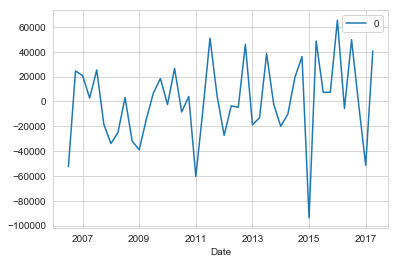

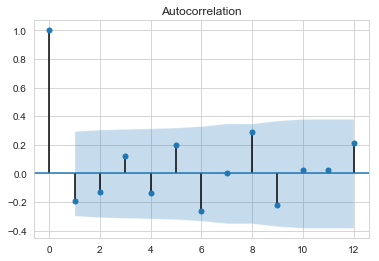

In [162]:
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [163]:
# drop non-significant variables
X2_multi=df.drop(['Copper.Price','de','Russia GDP Growth, %','lag2_dcopper','lag1_r','lag2_r'], axis=1)
Y_target=df.de

In [164]:
X2_multi=sm.tools.tools.add_constant(X2_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     de   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     10.60
Date:                Thu, 16 May 2019   Prob (F-statistic):           6.55e-06
Time:                        17:26:19   Log-Likelihood:                -521.28
No. Observations:                  44   AIC:                             1053.
Df Residuals:                      39   BIC:                             1061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6333.7488   5507.345      1.150   

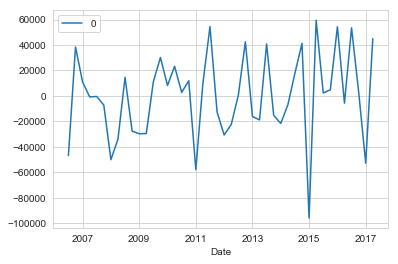

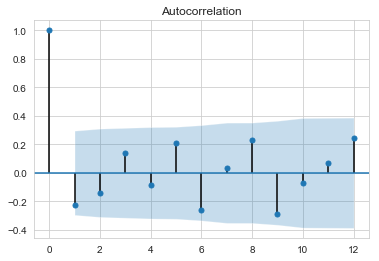

In [165]:
model = sm.OLS(Y_target, X2_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

The model has high R-square and significant variables are 1-lag of copper, 1-lag of exports, and 4-lag of exports. The results are economically meaningful, as the model takes into account the seasonality and importance of copper exports and suggests that increase in copper price will increase the total exports.

The ARDL model is better than ARIMA one, as it has lower AIC & BIC; AIC(1053<1168), BIC(1061<1174)